[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.8911456096214027
Confusion Matrix:
[[ 5501   756   895]
 [  116 10711   240]
 [  610   931 12834]]


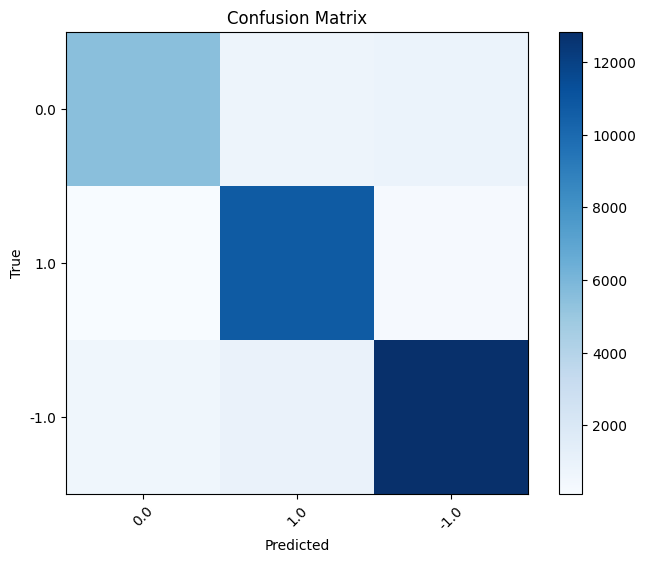

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


nltk.download('stopwords')


reddit_df = pd.read_csv("Reddit_Data.csv")
reddit_df = reddit_df[['clean_comment', 'category']]


twitter_df = pd.read_csv("Twitter_Data.csv")
twitter_df = twitter_df[['clean_text', 'category']]


df = pd.concat([reddit_df, twitter_df], ignore_index=True)


df.dropna(subset=['clean_text', 'category'], inplace=True)


stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['clean_text'] = df['clean_text'].apply(preprocess_text)


X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['category'], test_size=0.2, random_state=42)


vectorizer = TfidfVectorizer()
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)


classifier = LogisticRegression(max_iter=1000)
classifier.fit(tfidf_train, y_train)


predictions = classifier.predict(tfidf_test)


accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)


# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(df['category'])))
plt.xticks(tick_marks, list(set(df['category'])), rotation=45)
plt.yticks(tick_marks, list(set(df['category'])))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
